In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Dice game

The game involve two six-sided dice. In order to win, the player needs to roll the same number on both dice.

Let's say each bet costs Rs.1 & house offers a payout of Rs.4 .So for a sigle win player accumulates Rs.5 at the end of each win .

Let's simulate the game for 1000 rounds

In [ ]:
def roll_dice():
    die_1 = random.randint(1, 6)
    die_2 = random.randint(1, 6)

    if die_1 == die_2:
        same_num = True
    else:
        same_num = False
    return same_num

In [ ]:

def mc_simulation(fund,bet,max_num_rolls,num_simulations,hedging):
    win_probability = []
    end_balance = []
    
    _ = plt.figure()
    plt.title(f"Monte Carlo Dice Game")
    plt.xlabel("Roll Number")
    plt.ylabel("Balance [$]")
    plt.xlim([0, max_num_rolls])

    for i in range(num_simulations):
        # we plot current balance vs num_rolls ,that's why list
        balance = []
        balance.append(fund)
        num_rolls = [0] # haven't started the game yet
        num_wins = 0    # Run until the player has rolled max_num_rolls times
        while num_rolls[-1] < max_num_rolls:
            same = roll_dice()  
            if balance[-1]<1: #we've exhausted our balance
                break
            else:
                if same:
                    balance.append(balance[-1] + hedging[0] * bet) # playes win /house loose
                    num_wins += 1
                else:
                    balance.append(balance[-1] - hedging[1] * bet) # player loose/ house win

                num_rolls.append(num_rolls[-1] + 1)
        win_probability.append(num_wins/num_rolls[-1])
        end_balance.append(balance[-1])
        plt.plot(num_rolls, balance)
    plt.show()
    return win_probability,end_balance

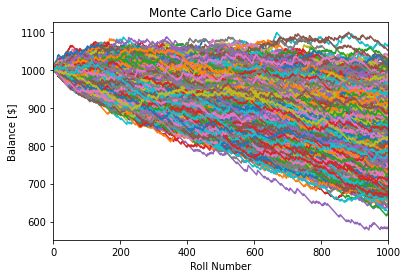

Average win probability after 10000 simulations: 0.16665299999999997
Average ending balance after 10000 simulations: $ 833.265


In [ ]:
# Averaging win probability and end balance
num_simulations = 10000
max_num_rolls = 1000
bet = 1
balance = 1000
# Effect on player : player loose/house win = - 1*bet , player win/house loss = 4*bet
hedging = [4,1] 
win_probability,end_balance = mc_simulation(balance,bet,max_num_rolls,
                                            num_simulations,hedging)

overall_win_probability = sum(win_probability)/len(win_probability)
overall_end_balance = sum(end_balance)/len(end_balance)
print(f"Average win probability after {num_simulations} simulations: {overall_win_probability}")
print(f"Average ending balance after {num_simulations} simulations: $ {overall_end_balance}")

## Martingle Strategy

The gambler's fallacy, also known as the Monte Carlo fallacy or the fallacy of the maturity of chances, is the incorrect belief that, if a particular event occurs more frequently than normal during the past, it is less likely to happen in the future (or vice versa), when it has otherwise been established that the probability of such events does not depend on what has happened in the past. 

**Rule  : when we loose we double our next bet amount** 


Even if the gambler can tolerate betting ~1,000 times their original bet, a streak of 10 losses in a row has an ~11% chance of occurring in a string of 200 plays. Such a loss streak would likely wipe out the bettor, as 10 consecutive losses using the martingale strategy means a loss of 1,023x the original bet.


In [ ]:


def mc_simulation(fund,bet,max_num_rolls,num_simulations,hedging):
    win_probability = []
    end_balance = []
    
    _ = plt.figure()
    plt.title(f"Monte Carlo Dice Game")
    plt.xlabel("Roll Number")
    plt.ylabel("Balance [$]")
    plt.xlim([0,max_num_rolls/10]) # well it's hard to last upto max_num_rolls

    for i in range(num_simulations):
        # we plot current balance vs num_rolls ,that's why list
        balance = []
        balance.append(fund)
        num_rolls = [0] # haven't started the game yet
        num_wins = 0    # Run until the player has rolled max_num_rolls times
        while num_rolls[-1] < max_num_rolls:
            same = roll_dice()  
            if balance[-1]<1 or balance[-1]<bet: #we've exhausted our balance
                break
            else:
                if same:
                    balance.append(balance[-1] + hedging[0] * bet) # playes win /house loose
                    #bet=bet*2 # Everytime we win , we'll double out bet
                    num_wins += 1
                else:
                    balance.append(balance[-1] - hedging[1] * bet) # player loose/ house win
                    bet=bet*2 # Everytime we loose , we'll  double out bet

                num_rolls.append(num_rolls[-1] + 1)
                
                win_probability.append(num_wins/num_rolls[-1])
                end_balance.append(balance[-1])
                plt.plot(num_rolls, balance)
                
    plt.show()
    return win_probability,end_balance

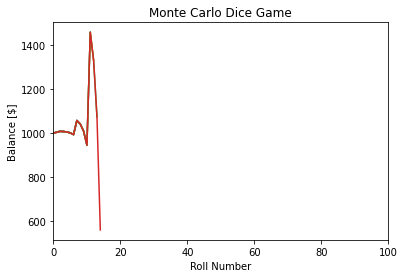

Average win probability after 10000 simulations: 0.47337721802007504
Average ending balance after 10000 simulations: $ 1035.0


In [ ]:
num_simulations = 10000
max_num_rolls = 1000
bet = 1
balance = 1000
# Effect on player : player loose/house win = - 1*bet , player win/house loss = 4*bet
hedging = [4,1] 
win_probability,end_balance = mc_simulation(balance,bet,max_num_rolls,
                                            num_simulations,hedging)

overall_win_probability = sum(win_probability)/len(win_probability)
overall_end_balance = sum(end_balance)/len(end_balance)
print(f"Average win probability after {num_simulations} simulations: {overall_win_probability}")
print(f"Average ending balance after {num_simulations} simulations: $ {overall_end_balance}")

Same concept but slightly differt way of implementation can result into different outcome , But they're close

In [ ]:


def mc_simulation_2(fund,bet,max_num_rolls,num_simulations,hedging):
    
    win_probability = []
    end_balance = []
    balance = []
    balance.append(fund)
    num_rolls = [0]
    num_wins = 0
    # since we'll be betting based on previous bet outcome #
    prev_bet = True
    # since we'll be doubling #
    prev_balance = bet
    inital_bet = bet
    while num_rolls[-1] < max_num_rolls:
        same = roll_dice()
        if prev_bet == True:
            if same:
                balance.append(balance[-1]+hedging[0]*bet)
                num_wins+=1
            else: 
                prev_bet = False
                prev_balance = bet
                balance.append(balance[-1]-hedging[1]*bet)
                if balance[-1] < 1:
                    break 
        else:
            bet = prev_balance * 2 # double the bet amount
            if same:
                #bet = inital_bet  #each time prev_bet=False/lose & current bet win we reset
                prev_bet = True
                balance.append(balance[-1]+hedging[0]*bet)
                num_wins+=1
            else:
                if balance[-1]<1:
                    break
                prev_bet = False
                prev_balance = bet
                balance.append(balance[-1]-hedging[1]*bet)
                if balance[-1]<1:
                    break

        num_rolls.append(num_rolls[-1] + 1)
        win_probability.append(num_wins/num_rolls[-1])
        end_balance.append(balance[-1])
        plt.plot(num_rolls, balance)
    
    plt.show()
    return win_probability,end_balance
        


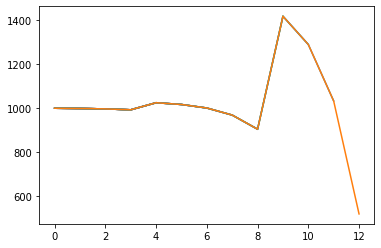

Average win probability after 10000 simulations: 0.1379359066859067
Average ending balance after 10000 simulations: $ 1013.8333333333334


In [ ]:
num_simulations = 10000
max_num_rolls = 1000
bet = 1
balance = 1000
# Effect on player : player loose/house win = - 1*bet , player win/house loss = 4*bet
hedging = [4,1] 
win_probability,end_balance = mc_simulation_2(balance,bet,max_num_rolls,
                                            num_simulations,hedging)

overall_win_probability = sum(win_probability)/len(win_probability)
overall_end_balance = sum(end_balance)/len(end_balance)
print(f"Average win probability after {num_simulations} simulations: {overall_win_probability}")
print(f"Average ending balance after {num_simulations} simulations: $ {overall_end_balance}")


So as we can see winning % for simple betting is 16% while for Martingle strategy it's 38% but both are below 50% we can try increasing inital balance & decrease max_num_rolls or any other combination of them to get a better winning % . 

The fundamental reason why all martingale-type betting systems fail is that no amount of information about the results of past bets can be used to predict the results of a future bet with accuracy better than chance. In mathematical terminology, this corresponds to the assumption that the win–loss outcomes of each bet are independent and identically distributed random variables, an assumption which is valid in many realistic situations. It follows from this assumption that the expected value of a series of bets is equal to the sum, over all bets that could potentially occur in the series, of the expected value of a potential bet times the probability that the player will make that bet. In most casino games, the expected value of any individual bet is negative, so the sum of many negative numbers will also always be negative.

The martingale strategy fails even with unbounded stopping time, as long as there is a limit on earnings or on the bets (which is also true in practice).[2] It is only with unbounded wealth, bets and time that it could be argued that the martingale becomes a winning strategy. 